<h1 align='center'>Star Wars survey</h1>
***

In [1]:
import pandas as pd
import numpy as np

In [2]:
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [3]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

In [6]:
yes_no = {'Yes': True, 'No': False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [7]:
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1', 'Unnamed: 4': 'seen_2', 'Unnamed: 5': 'seen_3', 'Unnamed: 6': 'seen_4', 'Unnamed: 7': 'seen_5', 'Unnamed: 8': 'seen_6'})

In [8]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [9]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [10]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float) 

In [11]:
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1', 'Unnamed: 10': 'ranking_2', 'Unnamed: 11': 'ranking_3', 'Unnamed: 12': 'ranking_4', 'Unnamed: 13': 'ranking_5', 'Unnamed: 14': 'ranking_6'})

<p>So far, I've renamed some columns, change the data in them to simplify the analysis and got rid of some NaN values.</p>

In [12]:
means = star_wars[star_wars.columns[9:15]].mean()
means

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

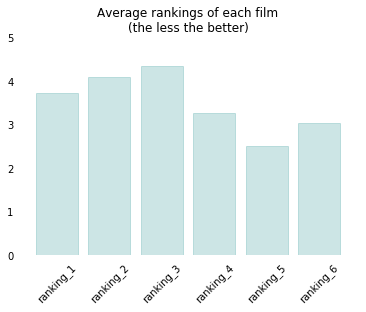

In [14]:
positions = np.arange(len(means))
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.bar(positions, means, align='center', alpha=0.2, color='teal', edgecolor='teal')
ax1.set_xticks(positions)
ax1.set_xticklabels(means.index, rotation=45)
ax1.tick_params(left=False, right=False, top=False, bottom=False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
plt.title('Average rankings of each film\n(the less the better)', fontdict={'fontsize': 17})
ax1.set_ylim(0, 5, 1)
plt.show()

<font face='verdana' size='4'></p>We can see on the plot above, that the highest rated Star Wars movie, on average, is Episode V: The Empire Strikes Back.
<br>The original trilogy is considered by the responders better than the prequels. The reasons can be different. The original triolgy is considered classic, it is more popular, some viewers may be influenced by nostalgia, some may say that the prequels lost its predecessor's climate, tone. But either way, the results are clear: the originals are considered better</p>

In [15]:
watched = star_wars[star_wars.columns[3:9]].sum()

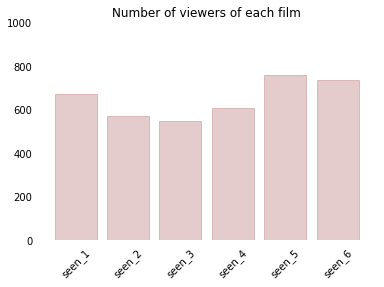

In [16]:
bar_positions = np.arange(len(watched))
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.bar(bar_positions, watched, align='center', alpha=0.2, color='maroon', edgecolor='maroon')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(watched.index, rotation=45)
ax1.tick_params(left=False, right=False, top=False, bottom=False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
plt.title('Number of viewers of each film', fontdict={'fontsize': 17})
ax1.set_ylim(0, 1000, 200)
plt.show()

<font face='verdana' size='4'>The most watched movie of the franchise is Episode V: The Empire Strikes Back. We can see some correlations between the number of viewers and the average rating.
<br>Here, we can also see proof that the original trilogy (at lest the last two episoded) is more popular than the prequels.</font>

In [17]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

In [18]:
watched_m = males[males.columns[3:9]].sum()
watched_f = females[females.columns[3:9]].sum()
means_m = males[males.columns[9:15]].mean()
means_f = females[females.columns[9:15]].mean()

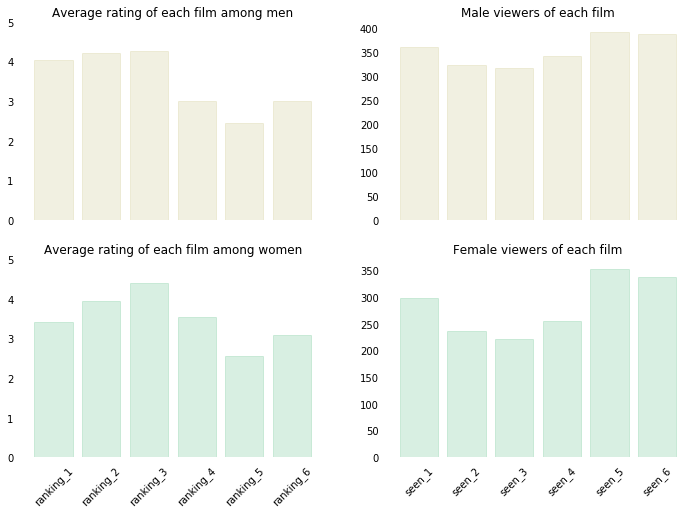

In [19]:
m_pos_mean = np.arange(len(means_m))
f_pos_mean = np.arange(len(means_f))
m_pos_watched = np.arange(len(watched_m))
f_pos_watched = np.arange(len(watched_f))
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,2)
ax4 = fig.add_subplot(2,2,4)
ax1.bar(m_pos_mean, means_m, align='center', alpha=0.2, color='darkkhaki', edgecolor='darkkhaki')
ax1.set_xticks(m_pos_mean)
ax1.set_xticklabels(labels=[])
ax1.tick_params(left=False, right=False, top=False, bottom=False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_ylim(0, 4.99, 1)
ax1.set_title('Average rating of each film among men')
ax2.bar(f_pos_mean, means_f, align='center', alpha=0.2, color='mediumseagreen', edgecolor='mediumseagreen')
ax2.set_xticks(f_pos_mean)
ax2.set_xticklabels(means_f.index, rotation=45)
ax2.tick_params(left=False, right=False, top=False, bottom=False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_ylim(0, 5, 2)
ax3.set_title('Male viewers of each film')
ax3.bar(m_pos_watched, watched_m, align='center', alpha=0.2, color='darkkhaki', edgecolor='darkkhaki')
ax3.set_xticks(m_pos_watched)
ax3.set_xticklabels(labels=[])
ax3.tick_params(left=False, right=False, top=False, bottom=False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax2.set_title('Average rating of each film among women')
ax4.bar(f_pos_watched, watched_f, align='center', alpha=0.2, color='mediumseagreen', edgecolor='mediumseagreen')
ax4.set_xticks(f_pos_watched)
ax4.set_xticklabels(watched_f.index, rotation=45)
ax4.tick_params(left=False, right=False, top=False, bottom=False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.set_title('Female viewers of each film')
#plt.title('Number of viewers of each film')
plt.show()

<font face='verdana' size='4'>We can see that the general trends remain the same but the scale is a bit different between genders. First of all, less women saw the franchise than men, especially the prequels. And female viewership changes a lot among movies, unlike men. On the other hand, both genders rank the movies in the same way, and the popularity ranking is also identical.</font>

In [66]:
viewers_columns = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
edu = star_wars.groupby('Education')[viewers_columns].agg(sum)
edu

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Education,,,,,,
Bachelor degree,206.0,170.0,163.0,195.0,243.0,234.0
Graduate degree,179.0,149.0,139.0,163.0,207.0,201.0
High school degree,57.0,48.0,48.0,53.0,61.0,60.0
Less than high school degree,3.0,3.0,3.0,3.0,3.0,3.0
Some college or Associate degree,211.0,186.0,183.0,180.0,227.0,223.0


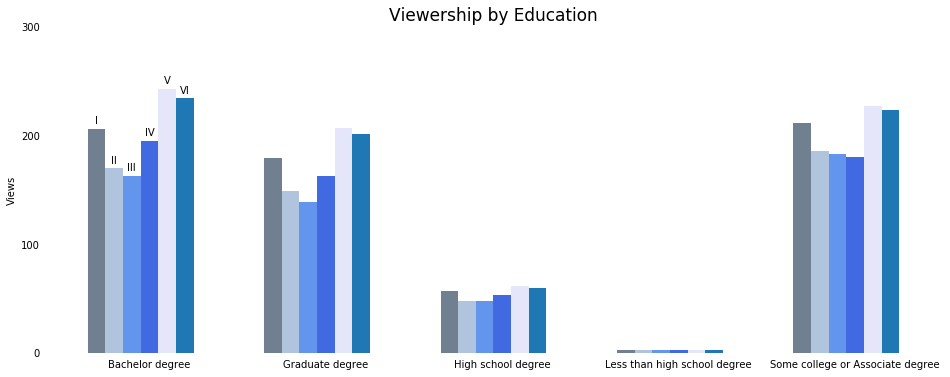

In [120]:
x = np.arange(5)
width = 0.1
fig, ax = plt.subplots(figsize=(16,6))
rects1 = ax.bar(x - 3 * width, edu['seen_1'], width, color='slategrey')
rects2 = ax.bar(x - 2 * width, edu['seen_2'], width, color='lightsteelblue')
rects3 = ax.bar(x - 1 * width, edu['seen_3'], width, color='cornflowerblue')
rects4 = ax.bar(x + 0 * width, edu['seen_4'], width, color='royalblue')
rects5 = ax.bar(x + 1 * width, edu['seen_5'], width, color='lavender')
rects6 = ax.bar(x + 2 * width, edu['seen_6'], width)
ax.set_xticks(x)
ax.set_xticklabels(['Bachelor degree', 'Graduate degree', 'High school degree', 'Less than high school degree', 'Some college or Associate degree'])

plt.title('Viewership by Education', fontdict={'fontsize': 17})

ax.set_ylabel('Views')
ax.set_yticks(np.arange(0,301, 100))
def visuals():
    ax.tick_params(left=False, right=False, top=False, bottom=False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

def autolabel(rects, episode, number_of_times=None):
    episodes = ['I', 'II', 'III', 'IV', 'V', 'VI']
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects[:number_of_times]:
        height = rect.get_height()
        ax.annotate('{}'.format(episodes[episode - 1]),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
visuals()
autolabel(rects1, 1, 1)
autolabel(rects2, 2, 1)
autolabel(rects3, 3, 1)
autolabel(rects4, 4, 1)
autolabel(rects5, 5, 1)
autolabel(rects6, 6, 1)
plt.show()



<font face='verdana' size='4'>The better educated the viewer the more likely he/she is to have watched Star Wars. Looking at different education levels we can see the same trends between episodes, Episode V being the most watched</font>

In [121]:
star_wars['Location (Census Region)'].unique()

array(['South Atlantic', 'West South Central', 'West North Central',
       'Middle Atlantic', 'East North Central', 'Pacific', nan,
       'Mountain', 'New England', 'East South Central'], dtype=object)

In [122]:
loc = star_wars.groupby('Location (Census Region)')[viewers_columns].agg(sum)
loc

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Location (Census Region),,,,,,
East North Central,102.0,89.0,89.0,95.0,128.0,121.0
East South Central,24.0,21.0,21.0,27.0,31.0,29.0
Middle Atlantic,79.0,69.0,70.0,76.0,83.0,85.0
Mountain,57.0,47.0,46.0,54.0,61.0,59.0
New England,50.0,44.0,43.0,48.0,55.0,54.0
Pacific,120.0,99.0,92.0,105.0,123.0,124.0
South Atlantic,104.0,82.0,79.0,93.0,125.0,120.0
West North Central,61.0,51.0,49.0,49.0,67.0,63.0
West South Central,62.0,58.0,50.0,49.0,70.0,69.0


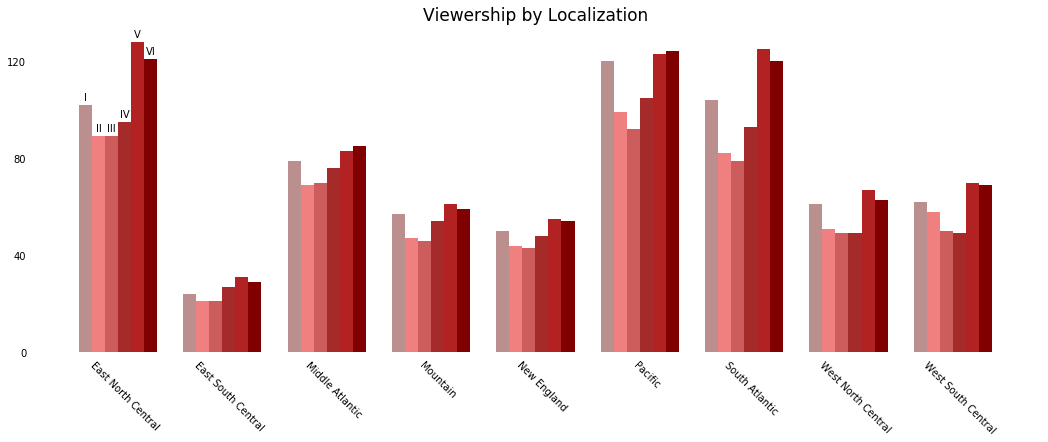

In [125]:
index = ['East North Central', 'East South Central', 'Middle Atlantic', 'Mountain', 'New England', 'Pacific', 'South Atlantic', 'West North Central', 'West South Central']
x = np.arange(9)
width = 0.125
fig, ax = plt.subplots(figsize=(18,6))
rects1 = ax.bar(x - 3 * width, loc['seen_1'], width, color='rosybrown')
rects2 = ax.bar(x - 2 * width, loc['seen_2'], width, color='lightcoral')
rects3 = ax.bar(x - 1 * width, loc['seen_3'], width, color='indianred')
rects4 = ax.bar(x + 0 * width, loc['seen_4'], width, color='brown')
rects5 = ax.bar(x + 1 * width, loc['seen_5'], width, color='firebrick')
rects6 = ax.bar(x + 2 * width, loc['seen_6'], width, color='maroon')
ax.set_xticks(x)
ax.set_xticklabels(index, rotation=-45)
ax.set_yticks(np.arange(0, 121, 40))


visuals()

autolabel(rects1, 1, 1)
autolabel(rects2, 2, 1)
autolabel(rects3, 3, 1)
autolabel(rects4, 4, 1)
autolabel(rects5, 5, 1)
autolabel(rects6, 6, 1)

plt.title('Viewership by Localization', fontdict={'fontsize': 17})
plt.show()

<font face='verdana' size='4'>When we look at responders' places of residence, we can see that the main trend remains the same, except for two localizations - Middle Atlantic and Pacific. Although Episode V still remains the king.</font>